## Desafío - Tabaquismo y gestación

In [54]:
#Antes de iniciar con el desafio vamos a importar la libreria pandas para poder trabajar con dataframes
import pandas as pd

#El segundo paso es leer el archivo csv donde obtendremos los datos
baby=pd.read_csv("baby.csv")

baby.head(10)

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
0,1,120,284,27,62,100,False
1,2,113,282,33,64,135,False
2,3,128,279,28,64,115,True
3,4,108,282,23,67,125,True
4,5,136,286,25,62,93,False
5,6,138,244,33,62,178,False
6,7,132,245,23,65,140,False
7,8,120,289,25,62,125,False
8,9,143,299,30,66,136,True
9,10,140,351,27,68,120,False


#### Empezamos...
#### 1. Realiza una exploración de los datos, considerando sus tipos y los descriptivos correspondientes

In [55]:
# Paso1: Como observamos, en el dataframe baby existe una columna llamada Unnamed la cual no contiene valores relevantes para el análisis, 
# por lo que eliminaremos dicha columna

df=baby.drop('Unnamed: 0', axis=1, inplace=False)
df

,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False
...,...,...,...,...,...,...
1169,113,275,27,60,100,False
1170,128,265,24,67,120,False
1171,130,291,30,65,150,True
1172,125,281,21,65,110,False


In [56]:
# Paso2: Exploraremos los Tipos de datos
print("Información general, Tipos de datos:")
info=pd.DataFrame(df.info())
info

Información general, Tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Birth.Weight               1174 non-null   int64
 1   Gestational.Days           1174 non-null   int64
 2   Maternal.Age               1174 non-null   int64
 3   Maternal.Height            1174 non-null   int64
 4   Maternal.Pregnancy.Weight  1174 non-null   int64
 5   Maternal.Smoker            1174 non-null   bool 
dtypes: bool(1), int64(5)
memory usage: 47.1 KB


""


In [57]:
# Paso3: Vamos a plantear los estadísticos descriptivos básicos para cada columna
print("\nEstadísticos descriptivos:")
estat=pd.DataFrame(df.describe().round(3))
estat


Estadísticos descriptivos:


,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight
count,1174.000,1174.000,1174.000,1174.000,1174.000
mean,119.463,279.101,27.228,64.049,128.479
std,18.329,16.010,5.818,2.526,20.734
min,55.000,148.000,15.000,53.000,87.000
25%,108.000,272.000,23.000,62.000,114.250
50%,120.000,280.000,26.000,64.000,125.000
75%,131.000,288.000,31.000,66.000,139.000
max,176.000,353.000,45.000,72.000,250.000


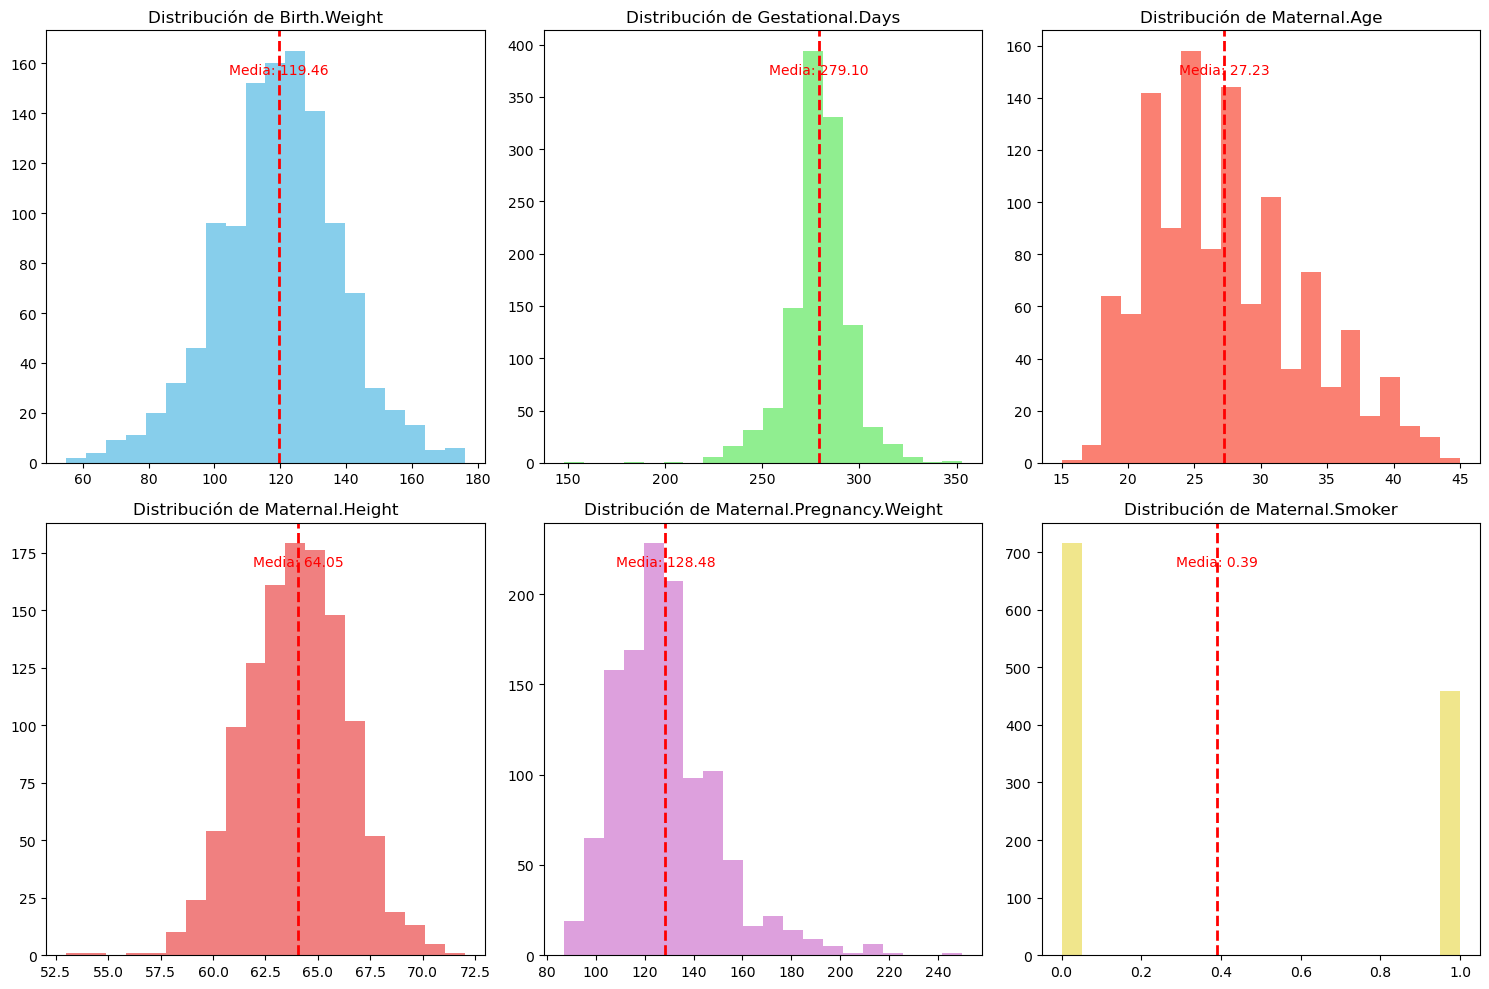

In [58]:
# Paso4: Vamos a graficar los valores de cada columna del dataframe y ver como se distribuyen

#importamos la libreria matplotlib para poder graficar los datos:
import matplotlib.pyplot as plt

# como vimos, antes de graficar tenemos que tener todas nuestras columnas del tipo numericas, por lo que
# la columna 'Maternal.Smoker' vamos a convertirla de booleana a numérica.
df['Maternal.Smoker'] = df['Maternal.Smoker'].astype(int)

# declaramos una lista con todos los nombres de las columnas del dataframe para luego meterlas a una iteracion:
columnas = ['Birth.Weight', 'Gestational.Days', 'Maternal.Age', 'Maternal.Height'\
            , 'Maternal.Pregnancy.Weight', 'Maternal.Smoker']

# luego creamos los subplots, los cuales indicare que se muestren en 3 columnas y 2 filas
# y cada gráfico tendra un tamaño de 15 x 10 pulgadas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Lista de colores diferentes para cada subplot
colores = ['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'plum', 'khaki']

# para iterar sobre las columnas y crear un histograma para cada una utilizare la funcion for / in
for i, col in enumerate(columnas):# enumerate me sirve para iterar sobre una lista
    ax = axes[i//3, i%3] #me sirve para ubicarme en cada espacio de mi matriz de graficos
    ax.hist(df[col], bins=20, color=colores[i]) # aqui defino las carateristicas del grafico de cada columna
    media = df[col].mean() # Calculamos la media de cada media
    ax.axvline(media, color='red', linestyle='dashed', linewidth=2)  # Dibujamos la línea de la media
    ax.set_title(f'Distribución de {col}') # le doy un titulo a cada grafico
    ax.text(media, ax.get_ylim()[1] * 0.9, f'Media: {media:.2f}', color='red', ha='center')# Agrego una etiqueta para la línea que representa la media

plt.tight_layout() # Ajusta los subplots en la matriz para que no se superpongan y se vean bien
plt.show() # y muestro cada subplot

In [59]:
# Paso5: Tambien deseo ver la correlacion que existe entre los datos, por lo que utilizo la funcion corr()
# lo cual me arroja los valores de correlacion en una matriz.
print("\nCorrelacion:")
correlacion=df.corr().round(3)
correlacion


Correlacion:


,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
Birth.Weight,1.000,0.408,0.027,0.204,0.156,-0.247
Gestational.Days,0.408,1.000,-0.053,0.070,0.024,-0.060
Maternal.Age,0.027,-0.053,1.000,-0.006,0.147,-0.068
Maternal.Height,0.204,0.070,-0.006,1.000,0.435,0.018
Maternal.Pregnancy.Weight,0.156,0.024,0.147,0.435,1.000,-0.060
Maternal.Smoker,-0.247,-0.060,-0.068,0.018,-0.060,1.000


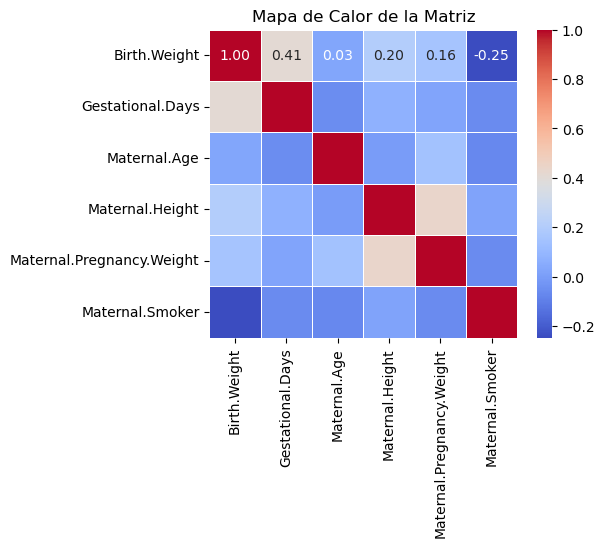

In [60]:
# Paso6: Graficare los datos de correlacion encontrados en el paso5

#importamos la libreria seaborn que me ayudara a crear el mapa de calor
import seaborn as sns

# Graficar el mapa de calor
plt.figure(figsize=(5, 4))  # Ajusta el tamaño de la figura
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True) # crea la matriz
plt.title('Mapa de Calor de la Matriz')
plt.show()

Interpretación:

De este último mapa de calor de las correlaciones por cada tipo de dato, observamos que las columnas con proporcionalidad directa son Birth.Weight y Gestational.Days y por otro lado las columnas con proporcionalidad inversa son Birth.Weight y Materanl.Smoker 

### 2. Considera los pesos de los bebés. ¿Se puede decir que siguen una distribución normal? Justifica tu respuesta creando los gráficos y modelos necesarios.

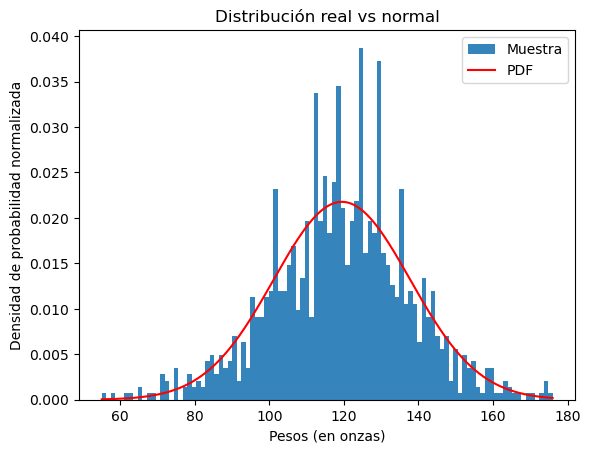

In [61]:
# Paso1: declaro un dataframe pesos que albergue los datos de la columna Birth Weight
pesos= df['Birth.Weight']

# Paso2: calculo los estadísticos para con ellos construir un modelo normalizado
mu=pesos.mean()
sigma=pesos.std()
minimo=pesos.min()
maximo=pesos.max()

# Paso3: creamos un arreglo de valores equidistantes entre los valores mínimo y máximo, utilizando linspace
import numpy as np
from scipy.stats import norm
x = np.linspace(minimo, maximo,1000000)

# Paso4: creamos una función, llamada pdf, que calcula el valor de la función de distribución de probabilidad normal, con los parámetros dados
pdf = norm.pdf(x, loc=mu, scale=sigma)

# Paso5: generamos un histograma de los datos. El parámetro "density=True" va a construir el histograma haciendo que la suma de todas las áreas de las barras sea igual a 1, para que podamos representar las probabilidades
plt.hist(pesos, bins=100, density=True, alpha=0.9, label='Muestra')#alpha=0.5 da un 50% de transparencia.

plt.plot(x, pdf, color='red', label='PDF') #Graficamos la distribución normal
plt.xlabel('Pesos (en onzas)') # para mostrar un nombre para el eje x
plt.ylabel('Densidad de probabilidad normalizada') # para mostrar un nombre para el eje y
plt.title('Distribución real vs normal') # para darle un titulo al grafico
plt.legend() # para mostrar una legenda
plt.show()

Interpretación:

Con la gráfica presentada observamos que, ciertamente, la distribución de los pesos de los bebes recien nacidos es muy similar a la distribucion normal teórica, sin embargo, mientras mas nos acercamos a la media, encontramos una frecuencia mucho mayor que la frecuencia normal de esos valores cercanos a 119.46 onzas (media).

In [62]:
# Paso6: Ahora vamos a confirmar si existe realmente una distribucion normal
from scipy.stats import shapiro

stat1, p_value1 = shapiro(df['Birth.Weight']) #Hallo los estadisticos de prueba y valor p de la prueba
print(f'Estadístico de prueba: {stat1}') #da una medida de cómo se ajustan los datos a una distribución normal
print(f'Valor p: {p_value1}')

if p_value1 > 0.05:
    print("No se puede rechazar la hipótesis nula. Los datos parecen seguir una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.")

Estadístico de prueba: 0.9956281185150146
Valor p: 0.00191177474334836
Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.


Interpretacion:

Si bien segun la prueba de Shapiro-Wilk, se rechaza que los datos de Birth.Weight sigan una distribucion normal, gracias al dato de estadistico de prueba se indica que la distribucion de los pesos es muy similar (99,6% muy cercano a 100%)

### 3. Considerando lo anterior, verifica el modelo de distribución normal de los pesos para 5 valores diferentes. Compara con los datos reales.

Peso		Prob. Teórica	Prob. Real
55.00 on	0.000045	0.000852
108.00 on	0.017900	0.011925
120.00 on	0.021757	0.025554
131.00 on	0.017854	0.019591
176.00 on	0.000187	0.000852




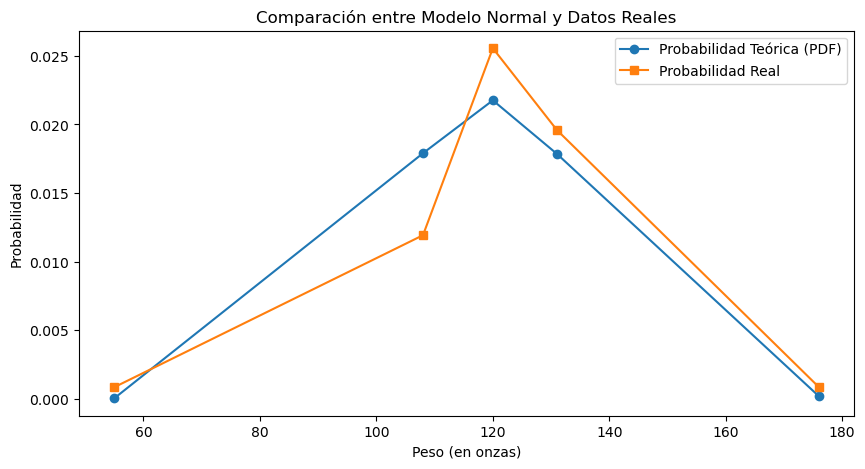

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Paso 1: Seleccionamos 5 valores para comparar
valores = [minimo, pesos.quantile(0.25), pesos.median(), pesos.quantile(0.75), maximo]

# Paso 2: Calculamos la probabilidad teórica y la probabilidad real
resultados = []
for valor in valores:
    prob_teorica = norm.pdf(valor, loc=mu, scale=sigma)
    prob_real = ((pesos >= valor - sigma/64) & (pesos < valor + sigma/64)).sum() / len(pesos)
    resultados.append((valor, prob_teorica, prob_real))

# Mostramos los resultados en una tabla
print("Peso\t\tProb. Teórica\tProb. Real")
for valor, prob_teorica, prob_real in resultados:
    print(f"{valor:.2f} on\t{prob_teorica:.6f}\t{prob_real:.6f}")

print('')
print('')
# Paso 3: Graficar la comparación
valores, prob_teorica, prob_real = zip(*resultados)

plt.figure(figsize=(10, 5))
plt.plot(valores, prob_teorica, 'o-', label='Probabilidad Teórica (PDF)')
plt.plot(valores, prob_real, 's-', label='Probabilidad Real')
plt.xlabel('Peso (en onzas)')
plt.ylabel('Probabilidad')
plt.title('Comparación entre Modelo Normal y Datos Reales')
plt.legend()
plt.show()

Interpretación:

Según el gráfico generado, podemos observar que mientras más nos acercamos al valor de la media, la probabilidad real vs teórica presenta mayor diferencia, incluso en lineas generales podemos indicar que existe una notable diferencia entre las probabilidades teórica y real, por lo que en conclusión es posible que la distribucion teórica no este capturando la verdadera distribución de datos.

In [64]:
# Paso4: Aplicaremos el mismo codigo para valores relevantes estadisticos y veremos como se comporta su prob. teorica y real en esos puntos
from scipy import stats

# Seleccionamos 5 valores de peso: Mínimo, Cuartil 1, Mediana, Cuartil 3 y Máximo
valores_peso = [minimo, pesos.quantile(0.25), pesos.median(), pesos.quantile(0.75), maximo]

# Calcular la densidad observada y teórica para estos valores
kde = stats.gaussian_kde(pesos)
densidades_observadas = kde(valores_peso)
densidades_teoricas = stats.norm.pdf(valores_peso, loc=mu, scale=sigma)

for valor, densidad_obs, densidad_teo in zip(valores_peso, densidades_observadas, densidades_teoricas):
    print(f'Peso: {valor:.2f} on - Prob. Real: {densidad_obs:.4f} - Prob. Teórica: {densidad_teo:.4f}')

Peso: 55.00 on - Prob. Real: 0.0002 - Prob. Teórica: 0.0000
Peso: 108.00 on - Prob. Real: 0.0161 - Prob. Teórica: 0.0179
Peso: 120.00 on - Prob. Real: 0.0230 - Prob. Teórica: 0.0218
Peso: 131.00 on - Prob. Real: 0.0186 - Prob. Teórica: 0.0179
Peso: 176.00 on - Prob. Real: 0.0004 - Prob. Teórica: 0.0002


Interpretación:

El modelo de distribución normal ajusta bien la mayoría de los valores en la distribución de pesos, especialmente en la región central (mediana y cuartiles). Sin embargo, en los extremos (mínimo y máximo), la distribución normal tiende a subestimar la densidad observada, lo que sugiere que puede haber más variabilidad en los datos reales que la que predice el modelo normal. Esto podría indicar la presencia de factores que afectan el peso de los bebés de manera no capturada por una distribución normal estándar.

### 4. Compara los pesos de los bebés de madres fumadoras y no fumadoras. ¿Qué diferencias existen? Explica y construye los modelos correspondientes.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


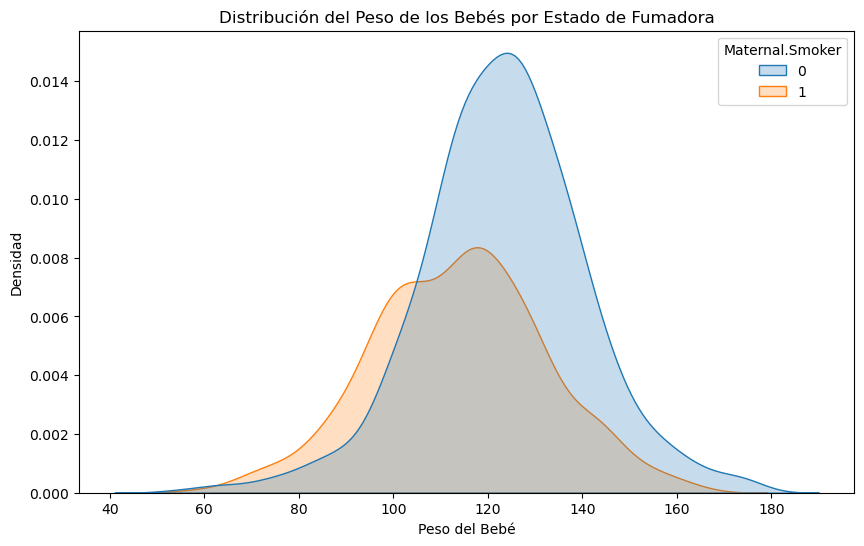

In [65]:
# Paso1: Crear el gráfico de densidad
plt.figure(figsize=(10, 6)) # esto es para definir el tamaño de los graficos
sns.kdeplot(data=df, x='Birth.Weight', hue='Maternal.Smoker', fill=True) #kdeplot me ayudara a graficar la densidad de los pesos de los besos por cada valor de Maternal.Smoker

# Configurar el título y etiquetas
plt.title('Distribución del Peso de los Bebés por Estado de Fumadora')
plt.xlabel('Peso del Bebé')
plt.ylabel('Densidad')

# Mostrar el gráfico
plt.show()

Interpretación:

Como se observa en los graficos superpuestos de los pesos de los bebés segun la condición de fumadora o no fumadora de la madre, vemos que los pesos de los bebés de las madres fumadoras son mucho más bajos que los pesos de las madres que no fuman

In [66]:
# Otra forma de comparar los pesos de los bebes es comparando sus estadisticos descriptivos:

# Paso1: Dividir el conjunto de datos en dos grupos
bebe_fumadoras = df.loc[df['Maternal.Smoker'] == True,['Birth.Weight']]
bebe_nfumadoras = df.loc[df['Maternal.Smoker'] == False,['Birth.Weight']]

# Paso2: Calcular estadísticas descriptivas de los grupos creados
#Para madres fumadoras:
mu_fumadoras = bebe_fumadoras.mean()
sigma_fumadoras = bebe_fumadoras.std()
min_fumadoras = bebe_fumadoras.min()
max_fumadoras = bebe_fumadoras.max()
rango_fumadoras = max_fumadoras - min_fumadoras

#Para madres no fumadoras:
mu_nfumadoras = bebe_nfumadoras.mean()
sigma_nfumadoras = bebe_nfumadoras.std()
min_nfumadoras = bebe_nfumadoras.min()
max_nfumadoras = bebe_nfumadoras.max()
rango_nfumadoras = max_nfumadoras - min_nfumadoras

# Crear un DataFrame
estadistico_comparacion = pd.DataFrame({
    'Categoría': ['Fumadoras', 'No Fumadoras'],
    'Media': [mu_fumadoras.values[0], mu_nfumadoras.values[0]],
    'Desviación Estándar': [sigma_fumadoras.values[0], sigma_nfumadoras.values[0]],
    'Mínimo': [min_fumadoras.values[0], min_nfumadoras.values[0]],
    'Máximo': [max_fumadoras.values[0], max_nfumadoras.values[0]],
    'Rango': [rango_fumadoras.values[0], rango_nfumadoras.values[0]]
})

# Mostrar el DataFrame
print(estadistico_comparacion)

      Categoría       Media  Desviación Estándar  Mínimo  Máximo  Rango
0     Fumadoras  113.819172            18.295010      58     163    105
1  No Fumadoras  123.085315            17.423695      55     176    121


Interpretación:

- En cuanto a la media podemos indicar que, en promedio los bebes de madres no fumadoras pesan mas que los bebes con madres fumadoras.

- En cuanto a la desviacion estandar, observamos que los pesos de bebes de madres no fumadoras estan menos dispersos que los pesos de los bebes de madres fumadoras.

- Por el lado de pesos minimos y maximos, observamos que si bien el maximo de pesos es menor en bebes de madres fumadoras, vemos tambien que el minimo de pesos es mayor en madrea fumadoras

- y finalmente en cuanto al rango de datos, observamos un menor rango de pesos de los bebes de madres fumadoras que de no fumadoras.

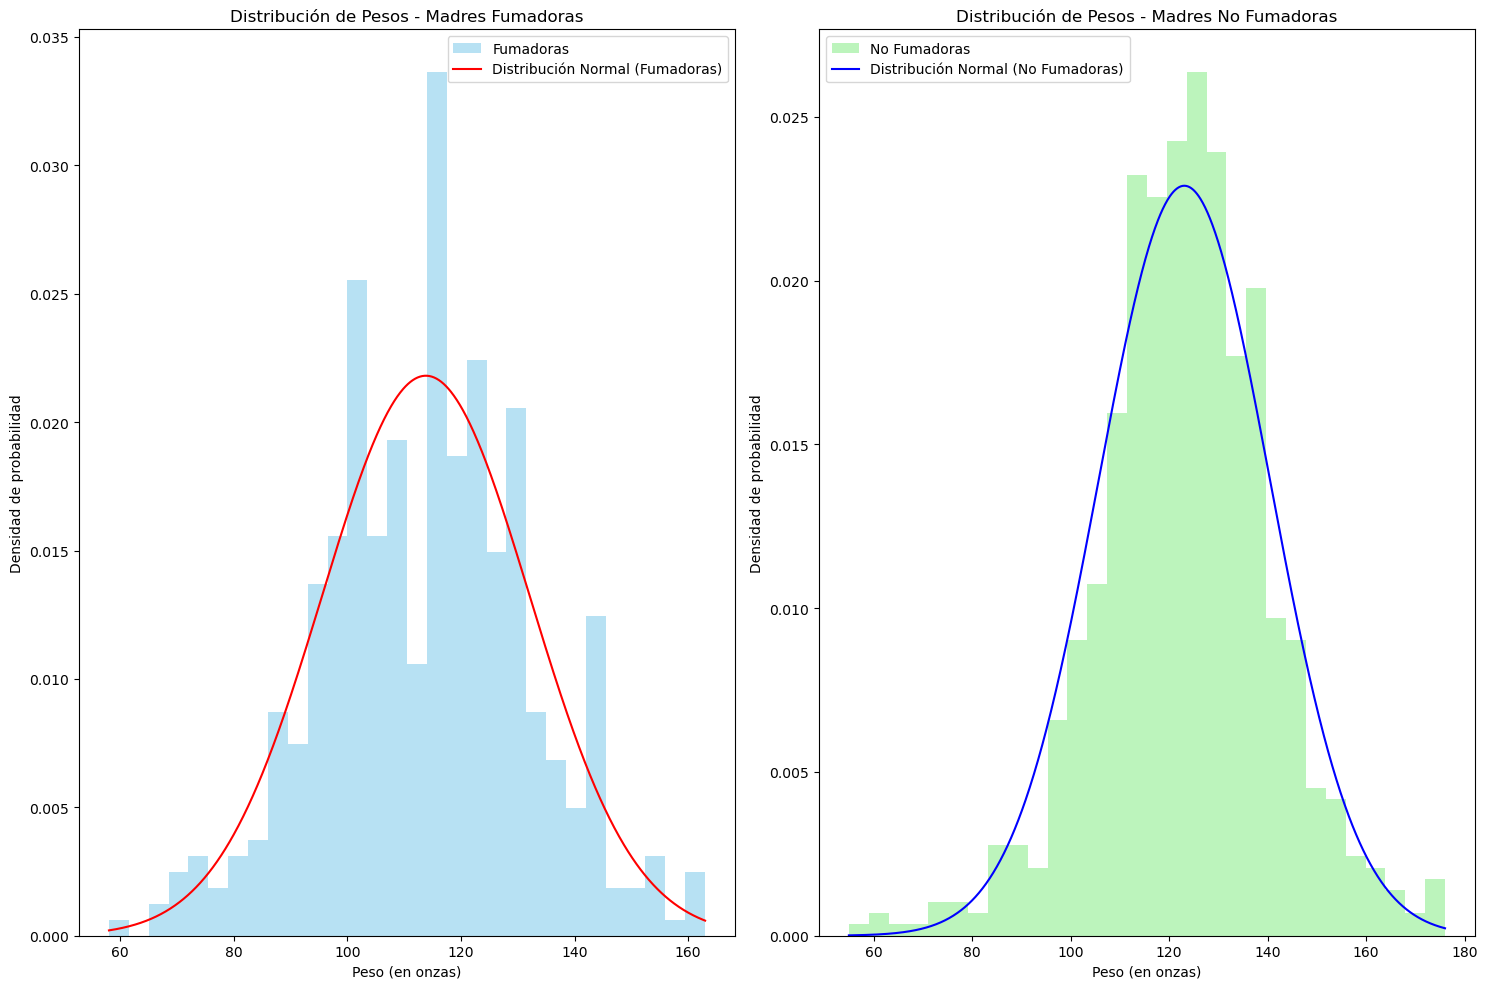

In [67]:
# y para continuar vamos a graficar sus distribuciones por separado:

# Paso3: Crear un arreglo de valores para las distribuciones normales
x_fumadoras = np.linspace(min_fumadoras, max_fumadoras, 1000)
x_nfumadoras = np.linspace(min_nfumadoras, max_nfumadoras, 1000)
# Distribuciones normales
pdf_fumadoras = norm.pdf(x_fumadoras, loc=mu_fumadoras, scale=sigma_fumadoras)
pdf_nfumadoras = norm.pdf(x_nfumadoras, loc=mu_nfumadoras, scale=sigma_nfumadoras)

# Paso4: Graficar histogramas y distribuciones normales
plt.figure(figsize=(15, 10)) # para determinar un tamaño de los graficos
# Histograma y distribución para madres fumadoras
plt.subplot(1, 2, 1)
plt.hist(bebe_fumadoras, bins=30, density=True, alpha=0.6, color='skyblue', label='Fumadoras')
plt.plot(x_fumadoras, pdf_fumadoras, 'r-', label='Distribución Normal (Fumadoras)')
plt.xlabel('Peso (en onzas)')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución de Pesos - Madres Fumadoras')
plt.legend()
# Histograma y distribución para madres no fumadoras
plt.subplot(1, 2, 2)
plt.hist(bebe_nfumadoras, bins=30, density=True, alpha=0.6, color='lightgreen', label='No Fumadoras')
plt.plot(x_nfumadoras, pdf_nfumadoras, 'b-', label='Distribución Normal (No Fumadoras)')
plt.xlabel('Peso (en onzas)')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución de Pesos - Madres No Fumadoras')
plt.legend()

# Paso5: vamos a mostrar los graficos
plt.tight_layout() # Ajusta los subplots en la figura para que no se superpongan y se vean bien
plt.show()

In [68]:
stat2, p_value2 = shapiro(bebe_fumadoras['Birth.Weight'])
print('Para el caso de pesos de bebes de madres fumadoras:')
print(f'Estadístico de prueba: {round(stat2,3)}')
print(f'Valor p: {round(p_value2,3)}')

if p_value2 > 0.05:#indico que estoy aceptando un error de 5%
    print("No se puede rechazar la hipótesis nula. Los datos parecen seguir una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.")

print()
print('Para el caso de pesos de bebes de madres no fumadoras:')
stat3, p_value3 = shapiro(bebe_nfumadoras['Birth.Weight'])
print(f'Estadístico de prueba: {round(stat3,3)}')
print(f'Valor p: {round(p_value3,3)}')

if p_value3 > 0.05:
    print("No se puede rechazar la hipótesis nula. Los datos parecen seguir una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.")

Para el caso de pesos de bebes de madres fumadoras:
Estadístico de prueba: 0.997
Valor p: 0.549
No se puede rechazar la hipótesis nula. Los datos parecen seguir una distribución normal.

Para el caso de pesos de bebes de madres no fumadoras:
Estadístico de prueba: 0.989
Valor p: 0.0
Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.


Aqui podemos indicar la prediccion de pesos de bebes de madres fumadoras va a ser mucho mas certero que la prediccion en el caso contrario, ya que los pesos de bebes de madres fumadoras siguen una distribucion normal, por otro lado cabe mencionar que si bien la distribucion de pesos de bebes de madres NO fumadoras no es normal, si es muy similar.

### 5. Considerando los datos dados:

#### ● Calcula la probabilidad de que una madre escogida al azar fume.

In [69]:
# Paso1: Calculamos el número total de madres
total_madres = len(df)

# Paso2: Calculamos el número de madres fumadoras
madres_fumadoras = df['Maternal.Smoker'].sum()

# Paso3: Finalmente calculamos la probabilidad de que una madre escogida al azar fume
probabilidad_fumar = madres_fumadoras / total_madres

print(f'La probabilidad de que una madre escogida al azar fume es: {probabilidad_fumar*100:.2f} %')

La probabilidad de que una madre escogida al azar fume es: 39.10 %


#### ● A partir del valor anterior, construye un modelo de distribución binomial que modele el experimento correspondiente a escoger 5 madres al azar y observar cuántas fuman.

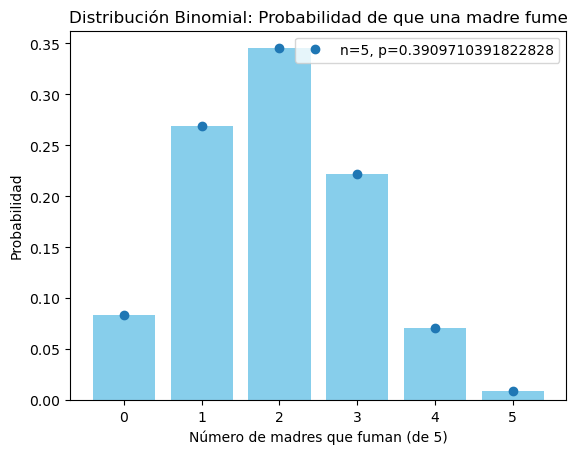

Número de éxitos	Probabilidad
0			0.0838
1			0.2689
2			0.3453
3			0.2217
4			0.0712
5			0.0091


In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Paso 1: Definir los parámetros del modelo binomial
n = 5  # Número de madres que escogemos al azar
p = probabilidad_fumar  # Probabilidad de éxito (madres que fuman)

# Paso 2: Crear el eje x (posibles éxitos, es decir, cuántas madres fuman)
x_axis = np.arange(n+1)

# Paso 3: Calcular la función de masa de probabilidad para la distribución binomial
pmf_values = binom.pmf(x_axis, n, p) #distribución binomial que nos da la probabilidad de que ocurra un número específico de éxitos (por ejemplo, 0, 1, 2, ... hasta n) en un número fijo de ensayos (n), dado que cada ensayo tiene una probabilidad p de éxito.

# Paso 4: Graficar la distribución
plt.bar(x_axis, pmf_values, color="skyblue")
plt.plot(x_axis, pmf_values, "o", label=f"n={n}, p={p}")
plt.title("Distribución Binomial: Probabilidad de que una madre fume")
plt.xlabel("Número de madres que fuman (de 5)")
plt.ylabel("Probabilidad")
plt.legend()
plt.show()

print("Número de éxitos\tProbabilidad")
for x, prob in zip(x_axis, pmf_values):
    print(f"{x}\t\t\t{prob:.4f}")

Interpretacion:

Existen mayor probabilidad de ocurrencia de que se presenten 2 madres fumadoras al azar y menor probabilidad de ocurrencia que se presenten 5 madres fumadoras al azar

#### ● Utilizando este modelo, simula 1000 muestras de tamaño 8, y calcula sus medias muestrales

Media de las medias binomiales: 1.95125
Desviación estándar de las medias binomiales: 0.38660986472153036


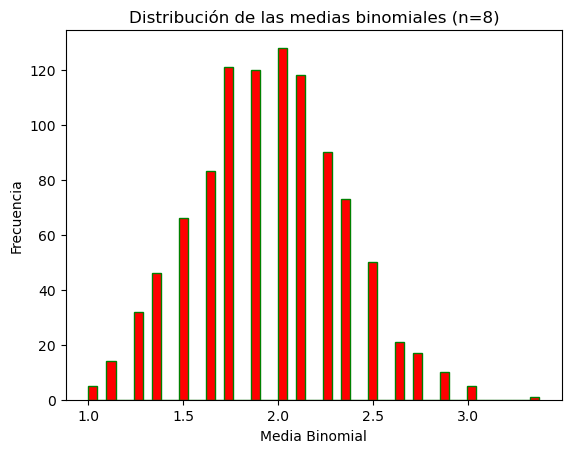

In [142]:
n_madres = 5  # Número de madres escogidas al azar
distr_binomial = stats.binom(n=n_madres, p=probabilidad_fumar)

n_simulaciones = 1000
tamano_muestra = 8

medias_binom = []
for _ in range(n_simulaciones):
    muestra = distr_binomial.rvs(size=tamano_muestra)
    medias_binom.append(np.mean(muestra))

medias_binom = np.array(medias_binom)

# Mostrar algunas estadísticas descriptivas
print("Media de las medias binomiales:", np.mean(medias_binom))
print("Desviación estándar de las medias binomiales:", np.std(medias_binom))

plt.hist(medias_binom, bins=50, color="red", edgecolor="green")
plt.title("Distribución de las medias binomiales (n=8)")
plt.xlabel("Media Binomial")
plt.ylabel("Frecuencia")
plt.show()

Interpretacion:

- Se observa que la distribucion de las medias binomiales es similar a una distribucion normal
- Respecto a la desviacion estandar, se presenta en un nivel bajo, por lo que se concluye que la distribucion normal de las medias es lo mas adecuado


#### ● Utilizando los datos directamente, extrae 1000 muestras de tamaño 8 y calcula sus respectivas medias muestrales.

Media de las medias muestrales: 1.9195
Desviación estándar de las medias muestrales: 0.3987336203532378


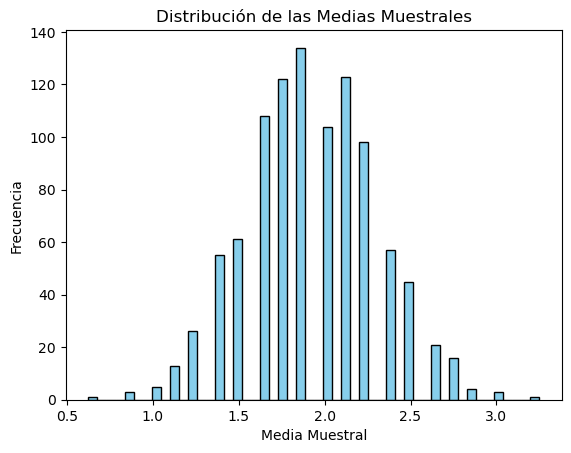

In [143]:
import numpy as np
import pandas as pd

# Supongamos que 'df' es tu DataFrame y 'Birth.Weight' es la columna con los datos
# Primero, asegúrate de que 'df' esté cargado y tenga la columna 'Birth.Weight'

# Configuración
num_muestras = 1000  # Número de muestras a extraer
tamano_muestra = 5   # Tamaño de cada muestra

# Listas para almacenar las medias muestrales
medias_muestrales = []
for k in range(1000):
  muestra=[]
  for t in range(8):
    muestra.append(sum(np.random.choice(df['Maternal.Smoker'],size=5,replace=False)))
  medias_muestrales.append(np.mean(muestra))
    
# Mostrar algunas estadísticas descriptivas
print("Media de las medias muestrales:", np.mean(medias_reales))
print("Desviación estándar de las medias muestrales:", np.std(medias_reales))

# Opcional: Histograma de las medias muestrales
import matplotlib.pyplot as plt

plt.hist(medias_muestrales, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Media Muestral')
plt.ylabel('Frecuencia')
plt.title('Distribución de las Medias Muestrales')
plt.show()

Interpretacion:

- Se observa que la distribucion de las medias muestrales es similar a una distribucion normal
- Respecto a la desviacion estandar, se presenta en un nivel bajo, por lo que se concluye que la distribucion normal de las medias es lo mas adecuado

#### Utilizando lo anterior:
#### ● compara gráficamente los resultados obtenidos anteriormente.
#### ● verifica el teorema del límite central, considerando las muestras de datos reales y las simuladas con el modelo binomial.
#### ● construye un modelo de distribución normal derivado del modelo binomial, y grafícalo junto a los anteriores para comparar. Concluye.

Promedio de la Muestras Binomiales 1.95125
Promedio de la Muestra ( DF)  1.923375
Desviación estandar de las media Binomiales 0.38660986472153036
Desviación estandar de las media Muestral 0.37838536490593816


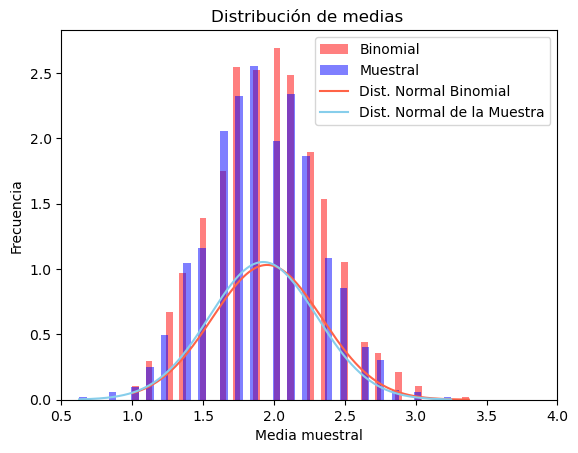

In [152]:
#  la probabilidad es p. Calculamos la media y desviación teóricas
mu=np.mean(medias_binom)
sigma=np.std(medias_binom)

minimo1=np.min(medias_binom)
maximo1=np.max(medias_binom)

x = np.linspace(minimo1, maximo1, num=1000)
# Normal  de las medias binomiales
pdf = norm.pdf(x, loc=mu, scale=sigma)

# Calculos  de la Muestra
mu2=np.mean(medias_muestrales)
sigma2=np.std(medias_muestrales)

minimo2=np.min(medias_muestrales)
maximo2=np.max(medias_muestrales)

x2 = np.linspace(minimo2, maximo2, num=1000)
# Normal  de la distribución de medias de la muestra
pdf2 = norm.pdf(x2, loc=mu2, scale=sigma2)

print('Promedio de la Muestras Binomiales' , mu)
print('Promedio de la Muestra ( DF) ' , mu2)

print('Desviación estandar de las media Binomiales',sigma)
print('Desviación estandar de las media Muestral', sigma2)

plt.title('Distribución de medias ')
plt.hist(medias_binom, bins=50,density=True,alpha=0.5, color='red', label='Binomial')
plt.hist(medias_muestrales, bins=50,density=True,alpha=0.5,color='blue', label='Muestral')
plt.plot(x, pdf, color='tomato', label='Dist. Normal Binomial')
plt.plot(x2, pdf2, color='skyblue', label='Dist. Normal de la Muestra')
plt.legend()
plt.xlim(0.5 ,4)
plt.xlabel('Media muestral')
plt.ylabel('Frecuencia')
plt.show()

Interpretacion:

- Ajuste del Modelo Binomial:
El hecho de que el promedio y la desviación estándar de las medias muestrales de la simulación binomial estén cerca de los valores calculados a partir de los datos reales sugiere que el modelo binomial es una buena aproximación para los datos reales.

- Verificación del Teorema del Límite Central:
La similitud en la forma de las distribuciones de medias muestrales y su dispersión apoya la idea del Teorema del Límite Central. El TLC establece que, dado un número suficiente de muestras y un tamaño de muestra adecuado, la distribución de las medias muestrales se aproximará a una distribución normal, lo cual parece ser el caso aquí.

- Evaluación Final:
Los resultados sugieren que la simulación binomial proporciona una buena aproximación para las medias muestrales de los datos reales y que el Teorema del Límite Central se está manifestando como se esperaba.